# Problem Set 3, due Wednesday, May 3rd, 5:30pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data_progresa = pd.read_csv('progresa_sample.csv.gz')
data_progresa.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [3]:
data_progresa.columns

Index([u'year', u'sex', u'indig', u'dist_sec', u'sc', u'grc', u'fam_n',
       u'min_dist', u'dist_cap', u'poor', u'progresa', u'hohedu', u'hohwag',
       u'welfare_index', u'hohsex', u'hohage', u'age', u'village', u'folnum',
       u'grc97', u'sc97'],
      dtype='object')

In [4]:
data = data_progresa.drop(['year','village','folnum'],axis=1)

In [5]:
mean_stats=data.mean().to_frame('mean')

In [6]:
std_stats = data.std().to_frame('std')

In [7]:
isnull_stats = data.isnull().sum().to_frame('missing values')
print(isnull_stats)

               missing values
sex                        24
indig                     300
dist_sec                    0
sc                       8453
grc                      6549
fam_n                       0
min_dist                    0
dist_cap                    0
poor                        0
progresa                    0
hohedu                      0
hohwag                      0
welfare_index             210
hohsex                     20
hohage                     10
age                         0
grc97                       0
sc97                     3872


In [8]:
summary_stats = pd.concat([mean_stats,std_stats,isnull_stats],axis=1)
summary_stats

,mean,std,missing values
age,11.366460,3.167744,0
dist_cap,147.674452,76.063134,0
dist_sec,2.418910,2.234109,0
fam_n,7.215715,2.352900,0
grc,3.963537,2.499063,6549
grc97,3.705372,2.572387,0
hohage,44.436717,11.620372,10
hohedu,2.768104,2.656106,0
hohsex,0.925185,0.263095,20
hohwag,586.985312,788.133664,0


The poor and progressa variables are categorical and have values in strings hence there are no summary statistics for them.

In [9]:
data_progresa.poor.value_counts(dropna=False)

pobre       65392
no pobre    11858
Name: poor, dtype: int64

In [10]:
data_progresa.progresa.value_counts(dropna=False)

basal    47560
0        29690
Name: progresa, dtype: int64

### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [11]:
data = data_progresa[data_progresa['year']==97]
data = data[data['poor']=='pobre']
data.shape

(32696, 21)

In [12]:
treatment = data[data['progresa']=='basal'].dropna(axis=0)
control = data[data['progresa']=='0'].dropna(axis=0)

In [13]:
treatment.shape

(19069, 21)

In [14]:
control.shape

(11669, 21)

In [15]:
cols = list(data.columns)
cols.remove('progresa')
cols.remove('poor')
cols

['year',
 'sex',
 'indig',
 'dist_sec',
 'sc',
 'grc',
 'fam_n',
 'min_dist',
 'dist_cap',
 'hohedu',
 'hohwag',
 'welfare_index',
 'hohsex',
 'hohage',
 'age',
 'village',
 'folnum',
 'grc97',
 'sc97']

In [16]:
tTtest_pValue = []
means_c = []
means_t = []
for i in cols:
    means_treatment = treatment[i].mean()
    means_t.append(means_treatment)
    means_control = control[i].mean()
    means_c.append(means_control)
    a = ttest_ind(treatment[i], control[i])
    tTtest_pValue.append(a.pvalue)
pvalue = pd.DataFrame(tTtest_pValue)
cols = pd.DataFrame(cols)
means_t_df=pd.DataFrame(means_t)
means_c_df = pd.DataFrame(means_c)
diff = means_t_df-means_c_df
final = pd.concat([cols,means_t_df,means_c_df,diff,pvalue],axis = 1,)
final.columns=['Variable Name','Average value (Treatment villages)','Average value (Control villages)','Difference (Treat - Control)','p-value']

In [17]:
final

,Variable Name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,year,97.000000,97.000000,0.000000,NaN
1,sex,0.520268,0.506556,0.013713,1.956962e-02
2,indig,0.316744,0.325306,-0.008562,1.183760e-01
3,dist_sec,2.399648,2.400687,-0.001039,9.670949e-01
4,sc,0.822697,0.815066,0.007631,9.117959e-02
5,grc,3.709214,3.733653,-0.024439,3.947750e-01
6,fam_n,7.281032,7.302939,-0.021907,4.236088e-01
7,min_dist,107.395231,103.098348,4.296884,1.936661e-18
8,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
9,hohedu,2.726729,2.660982,0.065747,2.613239e-02


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

Most of the variables in the year 1997 (baseline) are statististically significantly different. 
Age;
Sex;
Distance to an urban center;
Distance from a capital;
Head of Household Age;
Head of Household wage;
Head of household education;
Welfare Index;
Head of household age
and Village show some huge difference


As there are difference in the baseline population, a diff-in-diff is important to identify the causal relationship.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

In [18]:
data = data_progresa[data_progresa['year']==97]
data = data.groupby(['hohedu'])['sc'].mean()
data = pd.DataFrame(data)
data.reset_index(level=0,inplace=True)
data

,hohedu,sc
0,0,0.776137
1,1,0.768537
2,2,0.794552
3,3,0.802956
4,4,0.842951
5,5,0.849835
6,6,0.878469
7,7,0.889535
8,8,0.900000
9,9,0.925023


In [19]:
plt.scatter(data.hohedu,data.sc)

Linear relationship which means more the years of education, the more the enrollement in education for their children. There is a significant dip at 20 years of education though.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

In [20]:
data = data_progresa[data_progresa['poor']=='pobre']
treated = data[data['progresa']=='basal']

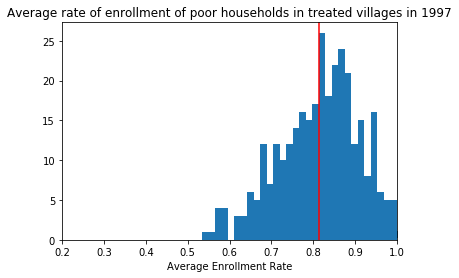

In [21]:
treated_97=treated[treated['year']==97]
x = treated_97.groupby(['village'])['sc'].mean()
y=x.to_frame('sc')
plt.hist(x,bins=30)
plt.xlim(0.2,1)
plt.axvline(y['sc'].mean(),color='r')
plt.xlabel("Average Enrollment Rate")
plt.title('Average rate of enrollment of poor households in treated villages in 1997')
plt.show()

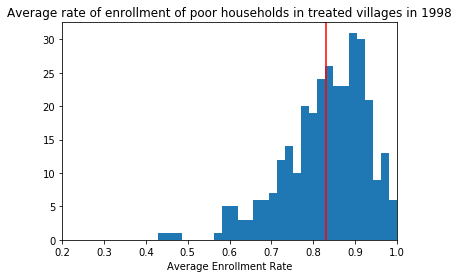

In [22]:
treated_98=treated[treated['year']==98]
z = treated_98.groupby(['village'])['sc'].mean()
w = z.to_frame('sc')
plt.hist(z,bins=30)
plt.xlim(0.2,1)
plt.axvline(w['sc'].mean(),color='r')
plt.xlabel("Average Enrollment Rate")
plt.title('Average rate of enrollment of poor households in treated villages in 1998')
plt.show()

In [23]:
ttest_ind(x,w)

Ttest_indResult(statistic=array([-2.01571349]), pvalue=array([ 0.0442487]))

There is a difference between villages treated in 1997 and in 1998. As the pvalue is less than 0.05 then its statistically significant.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [24]:
data = data_progresa[data_progresa['year']==98]
data = data[data['poor']=='pobre']

treatment = data[data['progresa']=='basal']
print("treatment",treatment.sc.mean())

control = data[data['progresa']=='0']
print("control",control.sc.mean())

print(ttest_ind(treatment['sc'].dropna(),control['sc'].dropna()))

('treatment', 0.8464791213954308)
('control', 0.807636956730308)
Ttest_indResult(statistic=8.3587205674183735, pvalue=6.636344447523235e-17)


In [25]:
treatment.shape

(20222, 21)

Since the pvalue is less than 0.05, the difference is statiscally significant after the Progressa Program took place

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [26]:
a = smf.ols(formula='sc~progresa',data=data).fit().summary()
print(a)

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 02 May 2018   Prob (F-statistic):           6.64e-17
Time:                        23:26:56   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.00

Progressa improved the likelyhood of child enrolling by 0.0388.




The results are the same. This means people enrolled in treated villages more than the control villages by a paercentage of 0.0388.


We can reject the null hypothesis (treatment group had no effect of Progressa) as the pvalue is less than 0.05

The counterfactual assumption is if the treatment was not provided then the enrollment in the treatment and control group would remain same.
1.Treatment causes the enrollment to increase.
2.Enrollement causes the treatment.
3.Other demographic factors cause the treatment and hence the enrollment

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [27]:
a = smf.ols(formula='sc~progresa+C(age)+sex+dist_sec+dist_cap+min_dist+hohedu+welfare_index+indig',data=data).fit().summary()
print(a)

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     753.9
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        23:26:57   Log-Likelihood:                -6365.7
No. Observations:               27267   AIC:                         1.277e+04
Df Residuals:                   27248   BIC:                         1.293e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8511      0.01

If we do controls for other demograhics and associated factors the effect of the Progressa program decreases by 0.049. The values for age show that they negatively imapact the enrollment into a program. Example children of 17 years old have 68% less chance of enrollement.  Also, the tstatic increases from 8.5 to 8.8. 

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [28]:
treatment = data_progresa[data_progresa['progresa']=='basal'][data_progresa['poor']=='pobre']

treatment_97 = treatment[treatment['year']==97]
treatment_97 = treatment_97.sc.mean()
treatment_98 = treatment[treatment['year']==98]
treatment_98 = treatment_98.sc.mean()
difference_treated = treatment_98 - treatment_97
difference_treated

/Users/sahilaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.023782233992046597

In [29]:
control = data_progresa[data_progresa['progresa']=='0'][data_progresa['poor']=='pobre']

control_97 = control[control['year']==97]
control_97 = control_97.sc.mean()
control_98 = control[control['year']==98]
control_98 = control_98.sc.mean()
difference_control = control_98 - control_97
difference_control

/Users/sahilaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


-0.007549046327276487

In [30]:
difference_treated-difference_control

0.031331280319323085

The estimate for the diff-in-diff model is 0.0313 which is lower than 0.0388.

The counterfactual assumption is that if the treatment was not given, the difference in enrollment from 1997 to 1998 for treatment group would be the same as that of control group.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [31]:
data_progresa=data_progresa[data_progresa['poor']=='pobre']
smf.ols(formula='sc~year*progresa',data=data_progresa).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Wed, 02 May 2018   Prob (F-statistic):           2.76e-18
Time:                        23:26:58   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.5474      0.497      3.112      0.002       0.573       2.522
progresa[T.basal]         -3.0316      0.632     -4.800      0.000      -4.270      -1.794
year                      -0.0075      0.005     -1.480      0.139      -0.018       0.002
year:progresa[T.basal]     0.0313      0.006      4.835      0.000       0.019       0.044
==============================================================================
Omnibus:                    15346.988   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30608.651
Skew:                          -1.711   Prob(JB):                         0.00
Kurtosis:                       3.937   Cond. No.                     5.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This confirms that the result from the tabular form was correct. 

In [32]:
data_progresa=data_progresa[data_progresa['poor']=='pobre']
a= smf.ols(formula='sc~year*progresa + sex + dist_sec + dist_cap + min_dist + hohedu',data=data_progresa).fit().summary()
print(a)

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 02 May 2018   Prob (F-statistic):          2.30e-281
Time:                        23:26:58   Log-Likelihood:                -25608.
No. Observations:               58352   AIC:                         5.123e+04
Df Residuals:                   58343   BIC:                         5.132e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

The impact of progresa according to this model is 0.0312. p-value is 2.43 * 10^-8 and standard error is 0.006

There seems to be no effect of the Progresa program as the pvalue is not less than 0.05 when we control for all variables in the regression.

The value of diff in diff slightly decreases from simple difference (0.0313) to regression (0.0312).

The counterfactual assumption is again that if the treatment was not given, the difference in enrollment from 1997 to 1998 for treatment group would be the same as that of control group

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

Progresa did have a casual impact on poor households in Mexico. 

Enrollment increased by 3% for the treatment group in contrast to the control group.

The change was very minute when accounted for all controls while performing diff-in-diff through regression.

